In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os 

file = os.path.join('MidwestMurderData.csv')
midwest_homicide_df = pd.read_csv(file)
midwest_homicide_df.head()

,index,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,189,197601001IA00801,"Boone, IA",IA00801,Iowa,Boone,Municipal police,FBI,No,1976,...,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Other arguments,NaN,0,0,30180.0,Iowa,Rural Iowa
1,190,197601001IA04400,"Henry, IA",IA04400,Iowa,Henry County,Sheriff,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Robbery,NaN,0,0,30180.0,Iowa,Rural Iowa
2,191,197601001IA05202,"Johnson, IA",IA05202,Iowa,Iowa City,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,NaN,0,0,30180.0,Iowa,"Iowa City, IA"
3,192,197601001IA05701,"Linn, IA",IA05701,Iowa,Cedar Rapids,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Husband,Other arguments,NaN,0,0,30180.0,Iowa,"Cedar Rapids, IA"
4,193,197601001IA05703,"Linn, IA",IA05703,Iowa,Hiawatha,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Brawl due to influence of alcohol,NaN,0,0,30180.0,Iowa,"Cedar Rapids, IA"


In [2]:
# Amber Start

## Many murderers walk among us as more and more homicides go unsolved.

Are homicide cases being successfully solved more frequently over time?

In [3]:
midwest_solved = midwest_homicide_df[['Year', 'Solved', 'ID']]

midwest_solved.head()

,Year,Solved,ID
0,1976,No,197601001IA00801
1,1976,Yes,197601001IA04400
2,1976,Yes,197601001IA05202
3,1976,Yes,197601001IA05701
4,1976,Yes,197601001IA05703


In [32]:
midwest_year_group = midwest_solved.groupby(['Year']).count()
midwest_year_group.head()

,Solved,ID
Year,,
1976,4209,4209
1977,4081,4081
1978,4019,4019
1979,4567,4567
1980,4670,4670


In [33]:
solved = midwest_solved.loc[midwest_solved["Solved"] == "Yes"]
midwest_solved_group = solved.groupby(['Year']).count()
midwest_solved_group.head()

,Solved,ID
Year,,
1976,3168,3168
1977,3059,3059
1978,3064,3064
1979,3394,3394
1980,3400,3400


In [34]:
midwest_solved_group["% Solved"] = midwest_solved_group["Solved"] / midwest_year_group["Solved"] * 100
midwest_solved_group = midwest_solved_group.reset_index(drop=False)
midwest_solved_group.head()

,Year,Solved,ID,% Solved
0,1976,3168,3168,75.267284
1,1977,3059,3059,74.957118
2,1978,3064,3064,76.237870
3,1979,3394,3394,74.315743
4,1980,3400,3400,72.805139


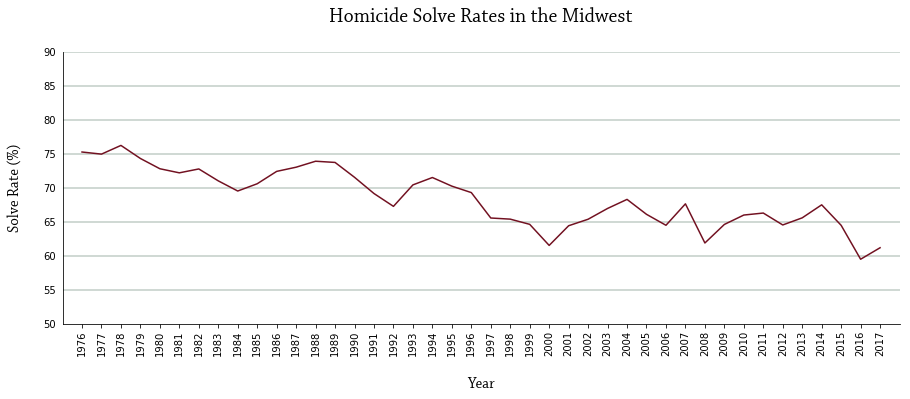

In [35]:
year = midwest_solved_group["Year"]
solved = midwest_solved_group["% Solved"]

fig, ax = plt.subplots(figsize=(15,5))

plt.plot(year, solved, color='#721121')

ax.set_title('Homicide Solve Rates in the Midwest', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(55, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(65, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(75, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(85, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(50, 90)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

In [8]:
midwest_cities = ['Chicago-Naperville-Joliet, IL-IN-WI',
                  'Indianapolis, IN',
                  'Minneapolis-St. Paul-Bloomington, MN-WI',]

cities_df = midwest_homicide_df[['MSA', 'Year', 'Solved']]
cities_df = cities_df[cities_df['MSA'].isin(midwest_cities)]
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,MSA,Year,Solved
0,"Omaha-Council Bluffs, NE-IA",1976,Yes
1,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
2,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
3,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
4,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes


In [9]:
cities_year_group = cities_df.groupby(['MSA', 'Year']).count().reset_index()
cities_year_group.head()

,MSA,Year,Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,1101
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,1123
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,1098
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,1251
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,1261


In [10]:
cities_solved = cities_df.loc[cities_df["Solved"] == "Yes"]
cities_solved = cities_solved.groupby(['MSA', 'Year']).count().reset_index()
cities_solved.head()

,MSA,Year,Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887


In [11]:
new_df = pd.merge(cities_solved, cities_year_group,  how='outer', left_on=['MSA','Year'], right_on = ['MSA','Year'])

In [12]:
new_df = new_df.rename(columns={'MSA': 'City', 
                                'Solved_x': 'Homicides Solved',
                                'Solved_y': 'Total Homicides'})
new_df.head()

,City,Year,Homicides Solved,Total Homicides
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850.0,1101
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825.0,1123
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829.0,1098
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911.0,1251
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887.0,1261


In [13]:
new_df["% Solved"] = new_df["Homicides Solved"] / new_df["Total Homicides"] * 100
new_df.head()

,City,Year,Homicides Solved,Total Homicides,% Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850.0,1101,77.202543
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825.0,1123,73.463936
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829.0,1098,75.500911
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911.0,1251,72.821743
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887.0,1261,70.340999


In [14]:
chicago = new_df[new_df["City"] == 'Chicago-Naperville-Joliet, IL-IN-WI']
indy = new_df[new_df["City"] == 'Indianapolis, IN']
mpls = new_df[new_df["City"] == 'Minneapolis-St. Paul-Bloomington, MN-WI']

In [15]:
mpls.head()

,City,Year,Homicides Solved,Total Homicides,% Solved
323,"Minneapolis-St. Paul-Bloomington, MN-WI",1976,54.0,78,69.230769
324,"Minneapolis-St. Paul-Bloomington, MN-WI",1977,62.0,75,82.666667
325,"Minneapolis-St. Paul-Bloomington, MN-WI",1978,43.0,54,79.629630
326,"Minneapolis-St. Paul-Bloomington, MN-WI",1979,55.0,75,73.333333
327,"Minneapolis-St. Paul-Bloomington, MN-WI",1980,58.0,75,77.333333


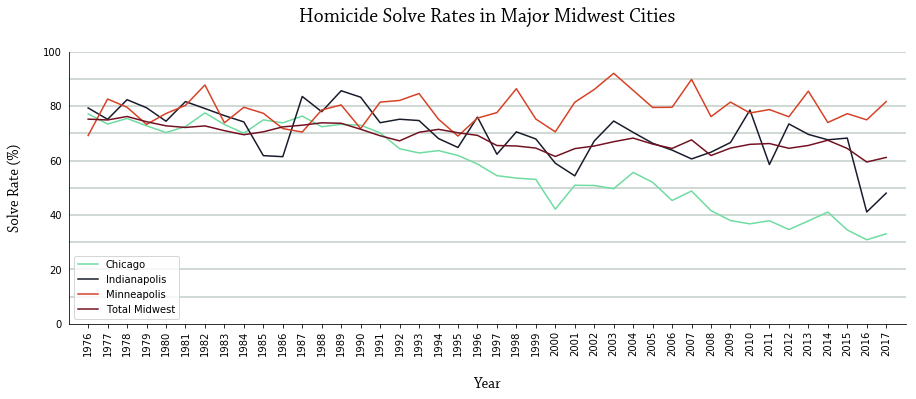

In [36]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(chicago["Year"], chicago["% Solved"], color='#6EDBA1', label="Chicago")
plt.plot(indy["Year"], indy["% Solved"], color='#171B2A', label="Indianapolis")
plt.plot(mpls["Year"], mpls["% Solved"], color='#D74125', label="Minneapolis")
plt.plot(year, solved, color='#721121', label = "Total Midwest")

ax.set_title('Homicide Solve Rates in Major Midwest Cities', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(10, 1975, 2018, color='#c1cdc6')
ax.hlines(20, 1975, 2018, color='#c1cdc6')
ax.hlines(30, 1975, 2018, color='#c1cdc6')
ax.hlines(40, 1975, 2018, color='#c1cdc6')
ax.hlines(50, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')
ax.hlines(100, 1975, 2018, color='#c1cdc6')

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(0, 100)

plt.legend()

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

In [17]:
midwest_total = midwest_homicide_df[['Year', 'ID']]

midwest_total.head()

,Year,ID
0,1976,197601001IA00801
1,1976,197601001IA04400
2,1976,197601001IA05202
3,1976,197601001IA05701
4,1976,197601001IA05703


In [18]:
midwest_total_group = midwest_total.groupby(['Year']).count().reset_index()
midwest_total_group.head()

,Year,ID
0,1976,4209
1,1977,4081
2,1978,4019
3,1979,4567
4,1980,4670


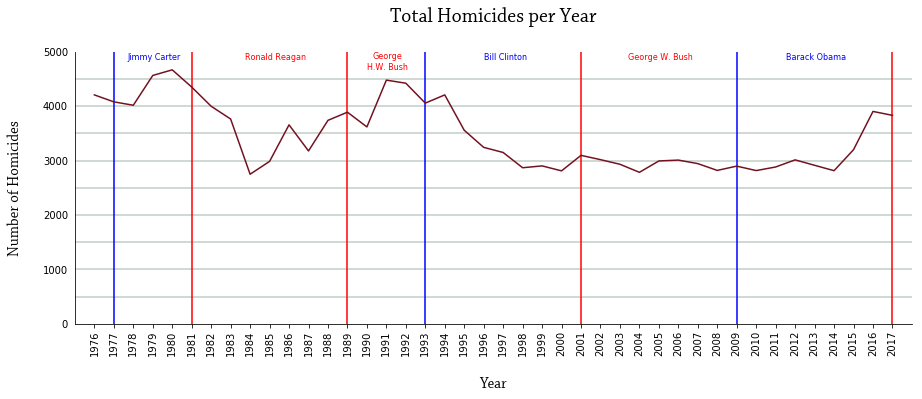

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(midwest_total_group["Year"], midwest_total_group["ID"], color='#721121')

ax.set_title('Total Homicides per Year', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Number of Homicides', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(500, 1975, 2018, color='#c1cdc6')
ax.hlines(1000, 1975, 2018, color='#c1cdc6')
ax.hlines(1500, 1975, 2018, color='#c1cdc6')
ax.hlines(2000, 1975, 2018, color='#c1cdc6')
ax.hlines(2500, 1975, 2018, color='#c1cdc6')
ax.hlines(3000, 1975, 2018, color='#c1cdc6')
ax.hlines(3500, 1975, 2018, color='#c1cdc6')
ax.hlines(4000, 1975, 2018, color='#c1cdc6')
ax.hlines(4500, 1975, 2018, color='#c1cdc6')

ax.vlines(1977, 0, 5000, color='blue')
ax.vlines(1981, 0, 5000, color='red')
ax.vlines(1989, 0, 5000, color='red')
ax.vlines(1993, 0, 5000, color='blue')
ax.vlines(2001, 0, 5000, color='red')
ax.vlines(2009, 0, 5000, color='blue')
ax.vlines(2017, 0, 5000, color='red')

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(0, 5000)

# ax.text(200, 1000, 'Obama')

# plt.legend()

ax.text(.885, .97, "Barack Obama", size=8, ha="center", color="blue",
         transform=ax.transAxes)
ax.text(.699, .97, "George W. Bush", size=8, ha="center", color="red", 
         transform=ax.transAxes)
ax.text(.515, .97, "Bill Clinton", size=8, ha="center", color="blue", 
         transform=ax.transAxes)
ax.text(.3735, .935, "George\nH.W. Bush", size=8, ha="center", color="red", 
         transform=ax.transAxes)
ax.text(.24, .97, "Ronald Reagan", size=8, ha="center", color="red", 
         transform=ax.transAxes)
ax.text(.095, .97, "Jimmy Carter", size=8, ha="center", color="blue", 
         transform=ax.transAxes)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

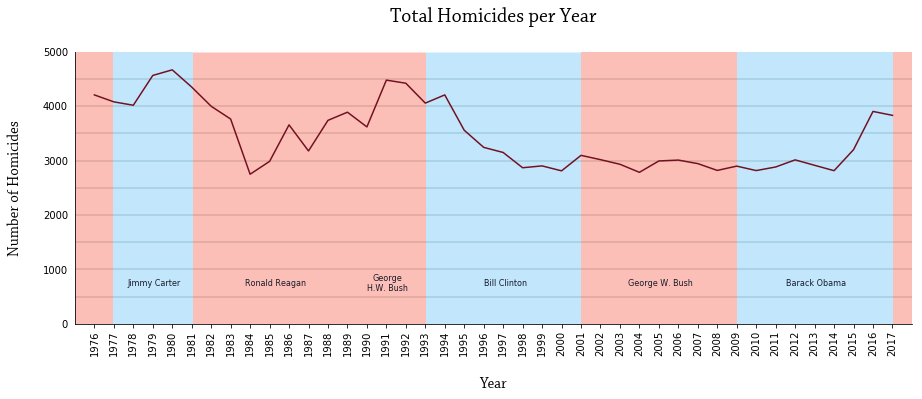

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(midwest_total_group["Year"], midwest_total_group["ID"], color='#721121')

ax.set_title('Total Homicides per Year', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Number of Homicides', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(500, 1975, 2018, color='#c1cdc6')
ax.hlines(1000, 1975, 2018, color='#c1cdc6')
ax.hlines(1500, 1975, 2018, color='#c1cdc6')
ax.hlines(2000, 1975, 2018, color='#c1cdc6')
ax.hlines(2500, 1975, 2018, color='#c1cdc6')
ax.hlines(3000, 1975, 2018, color='#c1cdc6')
ax.hlines(3500, 1975, 2018, color='#c1cdc6')
ax.hlines(4000, 1975, 2018, color='#c1cdc6')
ax.hlines(4500, 1975, 2018, color='#c1cdc6')

# ax.vlines(1977, 0, 5000, color='lightskyblue', linewidth=10)
ax.vlines(1979, 0, 5000, color='lightskyblue', linewidth=80, alpha=0.5)
# ax.vlines(1981, 0, 5000, color='red')
ax.vlines(1987, 0, 5000, color='salmon', linewidth=233, alpha=0.5)
# ax.vlines(1989, 500, 1000, color='salmon', alpha=0.8, linestyles='solid')
# ax.vlines(1993, 0, 5000, color='blue')
ax.vlines(1997, 0, 5000, color='lightskyblue', linewidth=155, alpha=0.5)
# ax.vlines(2001, 0, 5000, color='red')
ax.vlines(2005, 0, 5000, color='salmon', linewidth=156, alpha=0.5)
# ax.vlines(2009, 0, 5000, color='blue')
ax.vlines(2013, 0, 5000, color='lightskyblue', linewidth=156, alpha=0.5)
# ax.vlines(2017, 0, 5000, color='red')
ax.vlines(1976, 0, 5000, color='salmon', linewidth=38, alpha=0.5)
ax.vlines(2018, 0, 5000, color='salmon', linewidth=38, alpha=0.5)

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(0, 5000)

# ax.text(200, 1000, 'Obama')

# plt.legend()

ax.text(.885, .14, "Barack Obama", size=8, ha="center", color="#171B2A",
         transform=ax.transAxes)
ax.text(.699, .14, "George W. Bush", size=8, ha="center", color="#171B2A", 
         transform=ax.transAxes)
ax.text(.515, .14, "Bill Clinton", size=8, ha="center", color="#171B2A", 
         transform=ax.transAxes)
ax.text(.3735, .12, "George\nH.W. Bush", size=8, ha="center", color="#171B2A", 
         transform=ax.transAxes)
ax.text(.24, .14, "Ronald Reagan", size=8, ha="center", color="#171B2A", 
         transform=ax.transAxes)
ax.text(.095, .14, "Jimmy Carter", size=8, ha="center", color="#171B2A", 
         transform=ax.transAxes)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

In [21]:
dem = [4081, 4019, 4567, 4670, 4058, 4209, 3559, 3244, 3150, 2869, 2903, 2812, 2899, 2817, 
       2883, 3014, 2914, 2815, 3201, 3905]
rep = [4353, 4000, 3765, 2750, 2986, 3658, 3178, 3741, 3891, 3620, 4481, 4424, 3097, 3018,
       2933, 2785, 2994, 3010, 2945, 2820]

In [22]:
stats.ttest_ind(dem, rep, equal_var=False)

Ttest_indResult(statistic=0.03624044863078083, pvalue=0.9712820362443876)

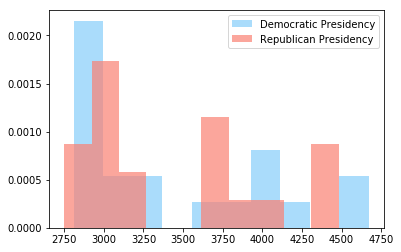

In [23]:
plt.subplot()

plt.hist(dem, 10, density=True, color='lightskyblue', alpha=0.7, label="Democratic Presidency")
plt.hist(rep, 10, density=True, color='salmon', alpha=0.7, label="Republican Presidency")
# plt.axvline(dem.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.axvline(rep.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
    
plt.show()

In [24]:
guns = [2866, 2736, 2735, 3025, 3003, 2799, 2487, 2272, 1701, 1851, 2250, 1863, 2243, 
        2328, 2326, 2949, 2971, 2878, 2919, 2445, 2236, 2134, 1945, 1908, 1825, 1785, 
        2015, 2005, 1844, 1995, 2082, 1961, 1927, 2017, 2027, 2058, 2207, 2092, 1997, 
        2370, 3008, 2939]

other_weapons = [1343, 1345, 1284, 1542, 1667, 1554, 1513, 1493, 1049, 1135, 1408, 1315, 
                 1498, 1563, 1294, 1532, 1453, 1180, 1290, 1114, 1008, 1016, 924, 995, 
                 987, 1312, 1003, 928, 941, 999, 928, 984, 893, 882, 790, 825, 807, 822, 
                 818, 831, 897, 894]

In [25]:
stats.ttest_ind(guns, other_weapons, equal_var=False)

Ttest_indResult(statistic=15.197868545433032, pvalue=8.601757949810224e-24)

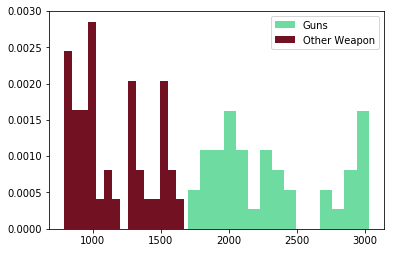

In [26]:
plt.subplot()

plt.hist(guns, 15, density=True, color='#6EDBA1', label="Guns")
plt.hist(other_weapons, 15, density=True, color='#721121', label="Other Weapon")

plt.legend() 
    
plt.show()

In [27]:
# Bimi End

In [28]:
# Devin Start

In [29]:
# Devin End

In [30]:
# Matt Start

In [31]:
# Matt End